In [11]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
#reading CSV and printing out top 5 rows
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


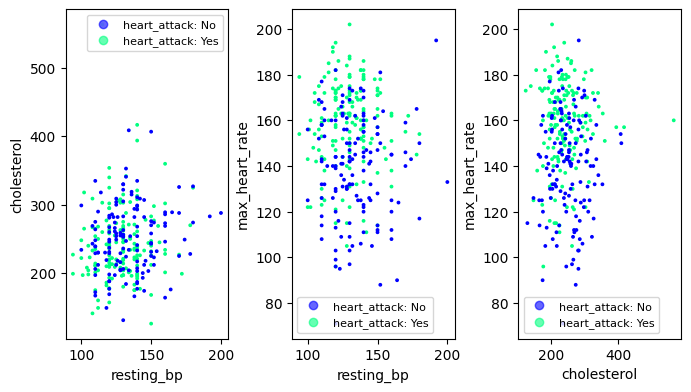

In [14]:
#subploting to check the relations b/w i/p variables
fig, ax = plt.subplots(1, 3,figsize=(7,4))
fig.tight_layout(pad=1.5)

plt.subplot(1,3,1)
scatter_0 = ax[0].scatter(df['trestbps'],df['chol'],c=df['target'],cmap='winter',s=3)
plt.xlabel('resting_bp')
plt.ylabel('cholesterol')
handles_0, labels_0 = scatter_0.legend_elements(prop="colors", alpha=0.6)
legend_labels = ["heart_attack: No", "heart_attack: Yes"]
ax[0].legend(handles_0, legend_labels, fontsize=8)

plt.subplot(1,3,2)
scatter_1 = ax[1].scatter(df['trestbps'],df['thalach'],c=df['target'],cmap='winter',s=3)
plt.xlabel('resting_bp')
plt.ylabel('max_heart_rate')
handles_1, labels_1 = scatter_1.legend_elements(prop="colors", alpha=0.6)
ax[1].legend(handles_1, legend_labels, fontsize=8)

plt.subplot(1,3,3)
scatter_2 = ax[2].scatter(df['chol'],df['thalach'],c=df['target'],cmap='winter',s=3)
plt.xlabel('cholesterol')
plt.ylabel('max_heart_rate')
handles_2, labels_2 = scatter_2.legend_elements(prop="colors", alpha=0.6)
ax[2].legend(handles_2, legend_labels, fontsize=8)

In [15]:
#identifying i/p and o/p variables
X = df.iloc[:,0:13]
y = df.iloc[:,-1]

In [16]:
#spliting training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [17]:
#training LogisticRegression model and predicting o/p
from sklearn.linear_model import LogisticRegression
log_reg_obj = LogisticRegression()
log_reg_obj.fit(X_train,y_train)
y_pred = log_reg_obj.predict(X_test)

C:\Users\Tnluser\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
#intercept and coefficients of Binary Classifier
print('Intercept :: Binary Classifier: ',log_reg_obj.intercept_)
print('Coefficients :: Binary Classifier: ',log_reg_obj.coef_)

Intercept :: Binary Classifier:  [0.02672541]
Coefficients :: Binary Classifier:  [[ 0.01222457 -1.41583811  0.83396306 -0.01393453 -0.00320559 -0.11546974
   0.57448681  0.02614712 -0.71133582 -0.40901588  0.61622869 -0.62511832
  -0.72014823]]


In [19]:
#classification metrics
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('-'*50)
display('Confusion Matrix: ',pd.DataFrame(confusion_matrix(y_test,y_pred),columns=list(range(0,2))))
print('-'*50)
print('Precision Score: ',precision_score(y_test,y_pred))
print('-'*50)
print('Recall Score: ',recall_score(y_test,y_pred))
print('-'*50)
print('F1 Score: ',f1_score(y_test,y_pred))
print('-'*50)

Accuracy Score:  0.9016393442622951
--------------------------------------------------


'Confusion Matrix: '

,0,1
0,26,6
1,0,29


--------------------------------------------------
Precision Score:  0.8285714285714286
--------------------------------------------------
Recall Score:  1.0
--------------------------------------------------
F1 Score:  0.90625
--------------------------------------------------
